In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [121]:
data = pd.read_csv("liver_disease_1.csv")

In [122]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [123]:
data.tail()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,No
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,Yes
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,Yes
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,Yes
582,38,1.0,0.3,216,21,24,7.3,4.4,1.50,No


In [124]:
data.dtypes
# Datatypes looks fine except Dataset column

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                        object
dtype: object

In [125]:
data.shape

(583, 10)

In [126]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    data.drop_duplicates(inplace=True)
data.shape
# Duplicate rows are removed

(570, 10)

In [127]:
print(data.isnull().sum())
if data.isnull().sum().sum() != 0:
    data.dropna(inplace=True)
print(data.shape)
# removed null value rows since it is very less number of rows also sensitive info so 
# better drop instead of replace with mean

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64
(566, 10)


In [128]:
data["Dataset"] = data.Dataset.eq('Yes').mul(1)
# Replacing the value of Yes to 1 & No to 0

(566, 5)


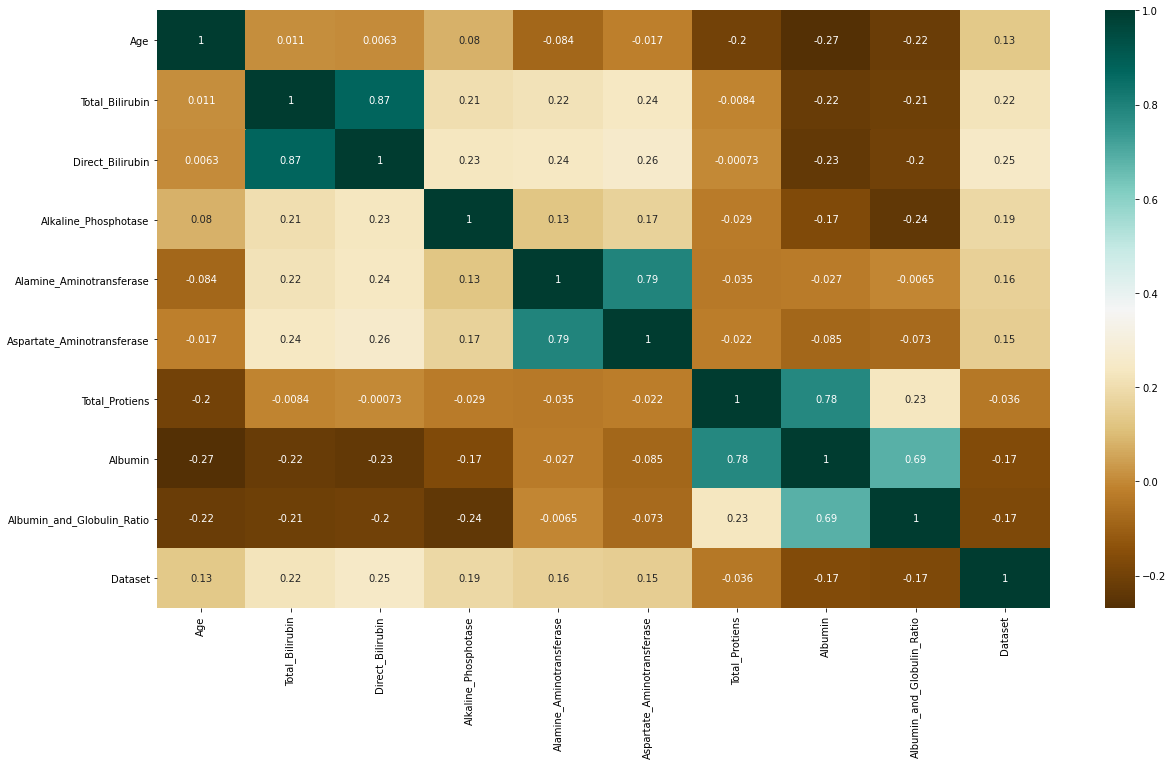

In [129]:
plt.figure(figsize=(20,11))
h = data.corr()
sns.heatmap(h,cmap="BrBG", annot=True)
data.drop(['Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio'], axis=1, inplace=True)
data.drop(['Total_Bilirubin', 'Aspartate_Aminotransferase'], axis=1, inplace=True)
print(data.shape)
# Looks 3 columns have -ve impact on output so dropping those

In [130]:
#Performing min max scaling for Independent attributes
X= np.array(data.drop(['Dataset'], 1))
y = np.array(data['Dataset'])
x_min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.0001,1))
x_scaled = x_min_max_scaler.fit_transform(X)
x_scaled = np.log(x_scaled)

In [131]:
# Splitting data to Training  80%, Cross validation 10%, Testing 10%
X_train, X_rem , y_train, y_rem = sklearn.model_selection.train_test_split(x_scaled, y, test_size=0.2)
X_cv, X_test , y_cv, y_test = sklearn.model_selection.train_test_split(X_rem, y_rem, test_size=0.5)

In [132]:
# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [133]:
cv_pred = gnb.predict(X_cv)

In [134]:
pd.crosstab(y_cv, cv_pred, rownames=['True'], colnames=['Predicted'], margins=True)
# First row First column is True -ve
# First row second column is False +ve
# Second row First column is False -ve
# Second row second column is True +ve

Predicted,0,1,All
True,,,
0,5,9,14
1,1,42,43
All,6,51,57


In [135]:
print(classification_report(y_cv, cv_pred))

              precision    recall  f1-score   support

           0       0.83      0.36      0.50        14
           1       0.82      0.98      0.89        43

    accuracy                           0.82        57
   macro avg       0.83      0.67      0.70        57
weighted avg       0.83      0.82      0.80        57



In [136]:
test_pred = gnb.predict(X_test)

In [137]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.50      0.19      0.27        16
           1       0.75      0.93      0.83        41

    accuracy                           0.72        57
   macro avg       0.62      0.56      0.55        57
weighted avg       0.68      0.72      0.67        57



# Logistic Regression starts here.

#### Using the same splitted data for Logistic Regression as well so that we can compare the results

In [138]:
# Applying Logistic Regression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
log_pred = logreg.predict(X_cv)

In [140]:
pd.crosstab(y_cv, log_pred, rownames=['True'], colnames=['Predicted'], margins=True)
# First row First column is True -ve
# First row second column is False +ve
# Second row First column is False -ve
# Second row second column is True +ve

Predicted,0,1,All
True,,,
0,2,12,14
1,3,40,43
All,5,52,57


In [141]:
print(classification_report(y_cv, log_pred))

              precision    recall  f1-score   support

           0       0.40      0.14      0.21        14
           1       0.77      0.93      0.84        43

    accuracy                           0.74        57
   macro avg       0.58      0.54      0.53        57
weighted avg       0.68      0.74      0.69        57



In [142]:
test_pred = logreg.predict(X_test)

In [143]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.20        16
           1       0.74      0.95      0.83        41

    accuracy                           0.72        57
   macro avg       0.62      0.54      0.51        57
weighted avg       0.67      0.72      0.65        57



Inference: When i drop the columns which have less impact then both the classifier shows nearly same accuracy for the same data. But if we didn't drop those columns then NB gives less accuracy compared to Logistic Regression.

If we drop one attribute in corelated atributes like dropping 'Total_Bilirubin', 'Aspartate_Aminotransferase' as well then getting more accuracy in Naive Bayes compared to Logistic regression since features are less.